# TC 5033
#**Master in Applied Artificial Intelligence**
##**Advanced Machine Learing Methods**
###Tecnológico de Monterrey
###Prof Dr. José Antonio Cantoral Ceballos

Team members:


*   A01240145 - Fabiola Sosa Hernández
*   A01745249 - Diana Aguilera Maturano
*   A01422588 - Jorge Barón Bacho
*   A00377571 - Marco Antonio Arellano Hernández
*   A01794906 - José Luis Artigas Arroyo


## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Library
Se importan las librerías para manejo de matrices, manipulación, análisis y  visualización de los datos y procesamiento de las imágenes.

In [ ]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import Data and Preprocessing

Como primer paso cargamos los datos del conjunto de entrenamiento (train) y validación (valid) del dataset del American Sign Languaje, que contiene imagenes que simbolizan caracteres con el uso de las manos.
Asimismo, exploramos y analizamos ambas tablas de train y valid para saber cómo están compuestas.

In [ ]:
DATA_PATH = '/content/sample_data/asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

#creación de un dataframe para la lectura de los pixeles a predecir

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
valid_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,9,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
train_df.shape, valid_df.shape

((27455, 785), (7172, 785))

In [ ]:
train_df.dtypes

,0
label,int64
pixel1,int64
pixel2,int64
pixel3,int64
pixel4,int64
...,...
pixel780,int64
pixel781,int64
pixel782,int64
pixel783,int64


In [ ]:
train_df.describe(include="all")

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,11.679476,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,6.880558,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,12.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,18.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,23.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
y_train = np.array(train_df['label']) #Aquí, se está extrayendo la columna 'label' del DataFrame train_df, que contiene las etiquetas (o clases) correspondientes a cada muestra de entrenamiento.
#La función np.array() convierte esta serie de pandas en un arreglo de NumPy, que se almacena en y_train.
y_val = np.array(valid_df['label'])
del train_df['label'] #Esta línea elimina la columna 'label' del DataFrame train_df, dejando solo las características de los datos (los datos de entrada). Esto es necesario porque, al entrenar un modelo, generalmente solo se utilizan las características como entradas, mientras que las etiquetas se utilizan por separado.
del valid_df['label']
x_train = train_df.values.astype(np.float32) #En esta línea, se convierten los datos restantes en train_df (que ahora solo contienen las características) en un arreglo de NumPy.
x_val = valid_df.values.astype(np.float32)

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape #devuelve los valores de entrenamiento y validación

((27455, 784), (27455,), (7172, 784), (7172,))

In [ ]:
from sklearn.model_selection import train_test_split #librería  para moder realizar una partición de los datos y poder entrenar un modelo de predicción

In [ ]:
def split_val_test(x, y, pct=0.5, shuffle=True): #Esta función tiene como objetivo dividir los datos en dos conjuntos, generalmente uno de validación (val) y uno de prueba (test), utilizando un porcentaje (pct) para determinar el tamaño de la división.
   # x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=pct,  shuffle=shuffle)
    total_data = x.shape[0] #número total de muestras
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]

        #Se crea un arreglo de índices (idxs) con np.arange(total_data), que generará un arreglo que va de 0 a total_data - 1.
        #Se mezclan estos índices de manera aleatoria con np.random.shuffle(idxs).
        #Luego, se reorganizan los datos x y y utilizando estos índices mezclados. Esto asegura que las muestras se asignen aleatoriamente antes de dividirse.

    split_idxs = int(total_data * pct) #Aquí se calcula cuántas muestras irán al conjunto de validación. Se multiplica el número total de muestras por el porcentaje (pct).

   #aquí se dividen los datos de entrenamiento y prueba
    x_val, x_test = x[:split_idxs], x[split_idxs:]
    y_val, y_test = y[:split_idxs], y[split_idxs:]

    return x_val, y_val, x_test, y_test # Return the split data

In [ ]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [ ]:
x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3586, 784), (3586,), (3586, 784), (3586,))

Debido a que en el lenguaje signado la identificación de las letras j y z se realiza moviendo la mano, se eliminarán dichas letras para el análisis.

In [ ]:
### The following
alphabet=list(string.ascii_lowercase)
alphabet.remove('j') # Letra J borrada porque requiere movimiento.
alphabet.remove('z') # Letra Z borrada porque requiere movimiento.
print(len(alphabet))

24


In [ ]:
print(alphabet)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']


#### Normalise
Normalizamos los valores de cada uno de los píxeles de cada una de las imágenes con la fórmula (valor / media * desviación estándar)

In [ ]:
x_train.mean(), x_train.std(), x_train.min()
#Media (x_train.mean()): Calcula la media de todos los valores en el conjunto de datos de entrenamiento. Esto te dice el valor promedio de los píxeles en las imágenes de entrenamiento.

#Desviación estándar (x_train.std()): Calcula la desviación estándar de los valores en el conjunto de datos de entrenamiento, lo cual indica la cantidad de dispersión o variabilidad en los valores de los píxeles.

#Valor mínimo (x_train.min()): Devuelve el valor mínimo de los píxeles en el conjunto de datos de entrenamiento.

(159.29083, 48.76953, 0.0)

In [ ]:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std
    #normaliza los datos
#Restar la media: Esto "centra" los datos, haciendo que el valor promedio de los datos normalizados sea 0.
#Dividir por la desviación estándar: Esto "escala" los datos para que tengan una dispersión uniforme, con una desviación estándar de 1.

In [ ]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

#Los datos de entrenamiento, validación y prueba son normalizados para que tengan una distribución uniforme y comparable.
#Esto ayuda a mejorar el rendimiento del modelo y garantiza que los datos de validación y prueba se mantengan consistentes con los de entrenamiento

In [ ]:
x_train.mean(), x_train.std(), x_train.min()
#obtenemos los resutlados de la normalización que esto es muy útil en algoritmos de aprendizaje automático porque evita que los valores más grandes o más pequeños dominen durante el proceso de entrenamiento.

(3.6268384e-06, 0.99999946, -3.2661958)

#### Graficar imagen
Graficamos una imagen alreatoria junto con su etiqueta para verificar la congruencia.

In [ ]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.reshape(28,28))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

     #Esta función toma una imagen y la muestra en una ventana usando Matplotlib, eliminando los ejes para una presentación más clara. Es útil para visualizar ejemplos individuales del conjunto de datos MNIST o cualquier otro conjunto de imágenes en escala de grises

La imagen muestreada representa un: p


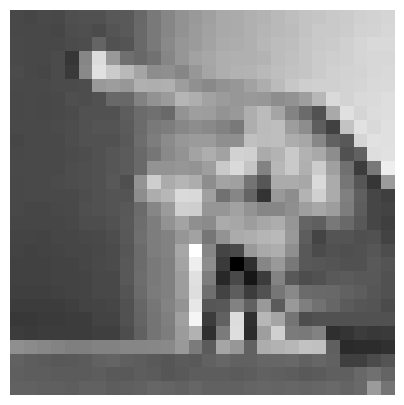

In [ ]:
rnd_idx = np.random.randint(len(y_test)) #Utiliza la función randint de NumPy para generar un número entero aleatorio entre 0 y el tamaño del conjunto de datos de prueba y_test. Esto selecciona aleatoriamente una imagen de ese conjunto.
print(f'La imagen muestreada representa un: {alphabet[y_test[rnd_idx]]}')
plot_number(x_test[rnd_idx].reshape(28,28))

#Este tipo de código es útil para verificar cómo se ven las imágenes en el conjunto de prueba y si las etiquetas asignadas son correcta

#### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Definición de funciones y Clases
Se definen varias clases y funciones que se implementaran en las capas de la red neuronal y en las funciones de activación.

#### Mini batches
Esta función crea minibatches que dividen el conjunto de datos en batches más pequeños.

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True):  #diseñada para dividir un conjunto de datos en minibatches, que son subconjuntos más pequeños de datos que se utilizan durante el entrenamiento de un modelo de aprendizaje automático
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'#Asegura que el número de muestras en x y y sea el mismo. Si no lo son, se lanzará un error
    total_data = x.shape[0] #Almacena el número total de muestras en la variable total_data
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

    #Utiliza una expresión generadora para crear minibatches.
#El bucle for recorre el rango de 0 a total_data con pasos de tamaño mb_size.
#Para cada i, se crea un tuple que contiene el minibatch de x (características) y y (etiquetas) desde el índice i hasta i + mb_size.

#### Clases Linear, ReLU y Sequential

In [ ]:
class np_tensor(np.ndarray): pass #La clase hereda de np.ndarray, lo que significa que np_tensor tendrá todas las características y métodos de un array de NumPy. Esto permite que se pueda utilizar como un array regular, pero también se le pueden agregar características adicionales
# cuando utilizamos pass, esto significa que la clase np_tensor no tiene atributos o métodos adicionales en este momento, pero se puede extender más adelante.

In [ ]:
a = np.array([0, 0])
b = a.view(np_tensor)

In [ ]:
type(a)

numpy.ndarray

In [ ]:
type(b)

__main__.np_tensor

In [ ]:
a == b

np_tensor([ True,  True])

In [ ]:
a is b

False

####  Clase Linear
Permite implementar una capa lineal de la red neuronal, con inicialización de pesos y cálculo de gradientes para la retropropagación.

In [ ]:
class Linear(): #representa una capa lineal en una red neuronal.
    def __init__(self, input_size, output_size):#input_size: Número de características de entrada (número de neuronas en la capa anterior), output_size: Número de neuronas en la capa actual (capa lineal).
        '''
        Init parameters utilizando Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)

         #Inicialización de pesos:
#Los pesos (W) se inicializan utilizando la inicialización de Kaiming He (también conocida como inicialización He). Esto ayuda a mantener la varianza de las activaciones en cada capa de la red.
#Se generan aleatoriamente los pesos con np.random.randn(output_size, input_size), que produce valores aleatorios con una distribución normal estándar.
#Luego se dividen por \sqrt{\frac{\text{input_size}}{2}} para escalar los valores adecuadamente.
#Los pesos son convertidos a la clase np_tensor mediante el método view.
#Inicialización de sesgo:
#El sesgo (b) se inicializa como un vector de ceros de forma (output_size, 1), también convertido a np_tensor.

    def __call__(self, X): # esta el foward de la clase lineal
        Z = self.W @ X + self.b
        return Z
#X: Es la entrada a la capa (un array que puede tener dimensiones (input_size, n_samples)).
#Cálculo de la salida:
#𝑍=𝑊⋅𝑋+𝑏
#Z=W⋅X+b, donde:
#@ es el operador de multiplicación matricial (dot product).
#Esto produce la salida Z, que tendrá dimensiones (output_size, n_samples).

    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)
        #se encarga de calcular los gradientes necesarios para actualizar los parámetros durante el entrenamiento.


#### Clase ReLU
Creamos la clase de función de activación para hacer transformaciones no lineales.

In [ ]:
class ReLU(): #la función de activación ReLU (Rectified Linear Unit) y su implementación para la retropropagación
    def __call__(self, Z): #Permite que la clase actúe como una función que aplica ReLU a la entrada Z, estableciendo valores negativos a cero.
        return np.maximum(0, Z) #La salida se calcula utilizando np.maximum(0, Z), lo que significa que cualquier valor en Z que sea menor o igual a cero se convierte en cero, y los valores positivos se mantienen.
    def backward(self, Z, A): #Calcula el gradiente de la entrada Z durante la retropropagación, estableciendo los gradientes a cero donde la entrada a ReLU era negativa
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

#### Clase Sequential
Esta clase permite crear una secuencia de varias capas en una red neuronal facilitando el paso hacia adelante, la retropropagación y actualización de parámetros.

In [ ]:
class Sequential_layers():

  #representa un modelo de red neuronal secuencial, donde se apilan capas de manera lineal.
# Esta implementación permite la propagación hacia adelante y hacia atrás a través de las capas, así como la actualización de los parámetros durante el entrenamiento. A continuación, desglosaremos cada parte de la clase.
    def __init__(self, layers): #Es una lista que contiene las capas del modelo, que pueden ser instancias de las clases Linear, ReLU, etc.
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers #Es una lista que contiene las capas del modelo, que pueden ser instancias de las clases Linear, ReLU, etc.
        self.x = None  #Inicializa x como None; este atributo se utilizará para almacenar la entrada en la pasada hacia adelante.
        self.outputs = {} #Un diccionario para almacenar las salidas de cada capa durante la pasada hacia adelante
    def __call__(self, X):#Realiza la pasada hacia adelante a través de todas las capas.
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x #Al final, se devuelve la salida de la última capa, que es la salida del modelo.
    def backward(self): #Realiza la retropropagación para calcular los gradientes.
        for i in reversed(range(len(self.layers))):  #Para cada capa, se llama al método backward, pasando la salida de la capa anterior y la salida de la capa actual.
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3): #Actualiza los parámetros de las capas utilizando los gradientes calculados.
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad #Para las capas Linear, se actualizan los pesos W y los sesgos b restando el producto del learning_rate y sus respectivos gradientes.
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X): #Realiza predicciones sobre nuevas entradas.
        return np.argmax(self.__call__(X)) #utiliza np.argmax para obtener el índice de la clase con la mayor probabilidad en la salida, que se puede interpretar como la predicción de clase.

#### Cost Function
Esta función calclua la función de activación softmax y la pérdida de entropía para el conjunto de datos de entrada 'x' y sus etiquetas 'y'.

In [ ]:
def softmaxXEntropy(x, y):
#x: Matriz de puntajes (logits) de las clases, donde cada columna representa una muestra y cada fila representa una clase. Tiene dimensiones (n_classes, batch_size).
#y: Vector de etiquetas verdaderas (ground truth) que indican la clase correcta para cada muestra. Se espera que tenga dimensiones (1, batch_size) o similar.

    batch_size = x.shape[1] #Se obtiene el tamaño del lote (número de muestras) a partir de la segunda dimensión de x.
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
#exp_scores: Se calculan las exponenciales de los puntajes en x para evitar problemas de estabilidad numérica al calcular softmax.
#probs: Se obtiene la probabilidad para cada clase mediante la fórmula de softmax, donde cada puntaje exponencial se divide por la suma de los puntajes exponenciales a lo largo de las clases para cada muestra.

    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size

    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()
    #Se actualizan las probabilidades restando 1 de las probabilidades correspondientes a las clases verdaderas, lo que se traduce en el cálculo del gradiente de la función de pérdida con respecto a los logits x.
    #x.grad: Se asigna el resultado a x.grad, que se espera que sea utilizado en la retropropagación para actualizar los pesos de la red.

    return preds, cost

### Creación y entrenamiento del modelo

Creamos y entrenamos el modelo de red neuronal secuencial utilizando las clases definidas previamente y se ajustan los hiperparámetros.

In [ ]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):#Entrena un modelo de red neuronal a través de múltiples épocas y minibatches
#model: El modelo de red neuronal que se entrenará (una instancia de Sequential_layers u otra clase similar).
#epochs: Número de épocas para las cuales se entrenará el modelo. Una época es una pasada completa a través de todo el conjunto de datos.
#mb_size: Tamaño del minibatch, que define cuántas muestras se utilizarán en cada iteración de entrenamiento (por defecto es 128).
#learning_rate: Tasa de aprendizaje que se usará para actualizar los parámetros del modelo.
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)): #Dentro de cada época, se generan minibatches utilizando la función create_minibatches, que divide el conjunto de entrenamiento (x_train, y_train) en lotes más pequeños.
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward() #Realiza la retropropagación para calcular los gradientes de los parámetros del modelo utilizando el costo calculado.
            model.update(learning_rate) # Actualiza los pesos y sesgos del modelo utilizando los gradientes calculados y la tasa de aprendizaje especificada.
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

In [ ]:
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
      #Utiliza la función create_minibatches para dividir el conjunto de datos en minibatches.
        #Dentro del ciclo, x son las características y y las etiquetas para el minibatch actual.
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
        #pred = model(x.T.view(np_tensor)): Se obtienen las predicciones del modelo. Se transpone x para obtener la forma correcta y se convierte a np_tensor.
        #np.argmax(pred, axis=0): Extrae la clase con la mayor probabilidad para cada muestra.
        #y.squeeze(): Aplana las etiquetas verdaderas para que sean compatibles con las predicciones.
        #np.sum(np.argmax(pred, axis=0) == y.squeeze()): Compara las predicciones con las etiquetas verdaderas y cuenta cuántas son correctas.
        #total += pred.shape[1]: Se incrementa el número total de muestras procesadas.
    return correct/total

In [ ]:
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, 24)]) #clasifica 24 opciones de señas
#Sequential_layers: Esta clase permite construir modelos de redes neuronales apilando capas de forma secuencial.
#Linear(784, 200): Esta es la primera capa lineal que toma 784 entradas (como en el caso de las imágenes de 28x28 píxeles de MNIST) y produce 200 salidas.
#ReLU(): Se utiliza una función de activación ReLU (Rectified Linear Unit) después de cada capa lineal, que introduce no linealidad en el modelo.
#Linear(200, 200): La segunda capa lineal toma 200 entradas y también produce 200 salidas.
#Linear(200, 24): La tercera capa lineal toma 200 entradas y produce 10 salidas, que corresponden a las 10 clases de dígitos en el conjunto de datos MNIST (0-9).

mb_size = 128 #batches de 128 a
learning_rate = 3e-3 #mayor inferencia en que suba el accuracy
epochs = 30

#mb_size = 512: Define el tamaño del minibatch, que indica cuántas muestras se procesarán en cada iteración durante el entrenamiento. Un tamaño de 512 es relativamente grande y puede acelerar el entrenamiento, aunque puede requerir más memoria.
#learning_rate = 1e-4: Establece la tasa de aprendizaje a 0.0001. Esta tasa controla cuánto se ajustan los pesos del modelo durante el entrenamiento. Un valor más pequeño generalmente significa un entrenamiento más estable, pero más lento.
#epochs = 20: Define el número de épocas, que es la cantidad de veces que el modelo pasará por todo el conjunto de datos durante el entrenamiento. 20 épocas son un número razonable para comenzar, pero puede requerir ajustes según el rendimiento del modelo.


In [ ]:
train(model, epochs, mb_size, learning_rate) #aquí estamos llevando acabo el modelo

costo: 0.007142691812619154, accuracy: 0.7763524818739542
costo: 0.0035280294629372213, accuracy: 0.7855549358616843
costo: 0.0019418529941832208, accuracy: 0.7919687674288901
costo: 0.0009465854497596969, accuracy: 0.7900167317345231
costo: 0.0005611700856776061, accuracy: 0.7939208031232571
costo: 0.0008073703102594467, accuracy: 0.7955939765755716
costo: 0.0006770661910125628, accuracy: 0.7961517010596765
costo: 0.0008510155877432991, accuracy: 0.7955939765755716
costo: 0.00044035852300443437, accuracy: 0.7961517010596765
costo: 0.0005002653102618243, accuracy: 0.795872838817624
costo: 0.0006259417004500776, accuracy: 0.797824874511991
costo: 0.0003238719924940977, accuracy: 0.7964305633017289
costo: 0.00040079228246183075, accuracy: 0.7967094255437813
costo: 0.0003473174367414189, accuracy: 0.7961517010596765
costo: 0.0003011035661633561, accuracy: 0.7955939765755716
costo: 0.00035448265302057467, accuracy: 0.7969882877858337
costo: 0.0005047576557251403, accuracy: 0.79615170105967

In [ ]:
print(accuracy(x_test, y_test, mb_size)) #devuelve el accuracy final

0.8028443948689348


Se mide la precisión del modelo usando una imagen del conjunto de prueba.

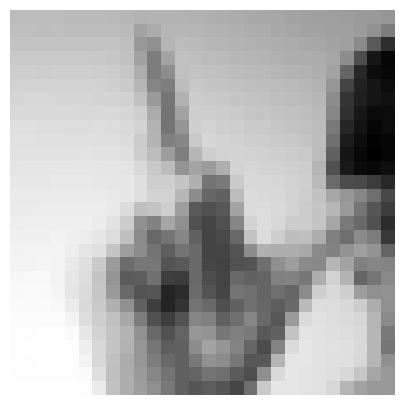

el valor predicho es: l el valor real es:l


In [ ]:
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
#Esta línea utiliza el modelo para hacer una predicción sobre la imagen seleccionada.
#x_test[idx].reshape(-1, 1) ajusta la forma de la imagen para que tenga las dimensiones correctas para ser pasada al modelo. Esto convierte la imagen en un vector de 784 elementos (28x28) y la reorganiza en una columna (1, 784).
#model.predict devuelve la clase (letra) que el modelo predice que corresponde a la imagen.
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx]]}')